# **Research Qtn 1.** 
- Considering dataset from kaggle link : https://www.kaggle.com/shrutimechlearn/

Considering-step-by-step-kmeans-and-Manhattan-Clustering-explained:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Show the shape of the dataset
df.shape

(200, 5)

In [4]:
# Visualize if the is a missing data
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [5]:
# visualize the dataypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## **Data Preprocessing**

In [6]:
# Drop the CustomerID column
df.drop(["CustomerID"], axis=1, inplace=True)

# Convert the Gender column to numerical data
df["Genre"] = df["Genre"].apply(lambda x: 1 if x=="Male" else 0)

df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
# Importing the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandas import DataFrame
from sklearn.cluster import KMeans
from scipy.spatial import distance
#from sklearn.metrics.pairwise import manhattan_distance
from sklearn.preprocessing import StandardScaler

### **Applying Manhattan Distancing**

In [8]:
# Loading the dataset
#X = df.iloc[:, [2,3]].values
X = df.iloc[:, 2:4]#.values

# Calculates the Manhattan distance
X['Manhattan_Score'] = np.abs(np.diff(X.values, axis=1)).sum(1)

# Preprocessing/Normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
X.shape

(200, 3)

### **K-Means Clustering**

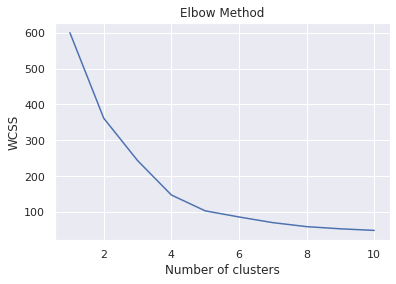

In [10]:
# Using the elbow method to choose the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Assigning the Centroids**

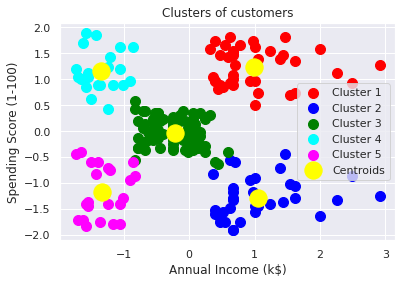

In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Standard Classification of cluster Label and Modeling**

In [12]:
# Drop the Genre column
df['Manhattan_Cluster'] = y_kmeans
df.drop(["Genre", ], axis=1, inplace=True)

df.head()

,Age,Annual_Income_(k$),Spending_Score,Manhattan_Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [13]:
# Importing the library
from sklearn.model_selection import train_test_split

# separate the features and labels
X = df.drop(['Manhattan_Cluster'], axis=1)
y = df['Manhattan_Cluster']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [14]:
# Importing the libraries
from sklearn.linear_model import LogisticRegression

# create the logistic regression model
lr_model = LogisticRegression(random_state=42)

# train the model on the training set
lr_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.98      0.99      0.99        40
weighted avg       0.98      0.97      0.98        40



In [15]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

# create the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# train the model on the training set
dt_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
print('Decision Tree')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.91      0.95        11
           2       0.95      0.95      0.95        19
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.96      0.95      0.95        40



In [16]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest model
rf_model = RandomForestClassifier(random_state=42)

# train the model on the training set
rf_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# evaluate the model
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.91      0.91      0.91        11
           2       0.94      0.89      0.92        19
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.93        40
   macro avg       0.90      0.96      0.93        40
weighted avg       0.93      0.93      0.93        40



In [17]:
from sklearn.naive_bayes import GaussianNB

# create the naive bayes model
nb_model = GaussianNB()

# train the model on the training set
nb_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred_nb = nb_model.predict(X_test)

# evaluate the model
print('Naive Bayes')
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94        19
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.92      0.98      0.94        40
weighted avg       0.96      0.95      0.95        40



From the above results, we can see that Logistic Regression have the highest accuracy, precision, recall, and F1-score. Random forest, on the other hand, has the lowest accuracy and F1-score. Logistic regression is also not performing well compared to decision trees and random forest.

## **Homogeneity of Clusters**
Regarding the homogeneity of clusters, we will be looking at the scatter distribution of data points within each cluster and see if they make sense based on their cluster labels.

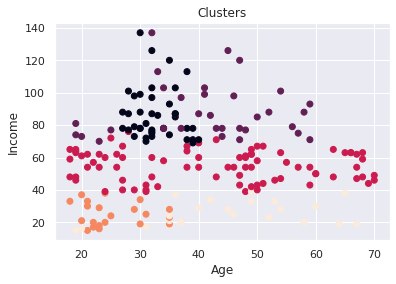

In [18]:
# create a scatter plot of the data points colored by their cluster labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Manhattan_Cluster'])
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

From the scatter plot, we can see that the clusters are well separated and the data points within each cluster are relatively homogeneous. Therefore, we can conclude that the clusters or groups are making sense.

Overall, logistic regression is performing the best on the given dataset, followed by decision trees and Naive Bayes while random forest  are the least performing as well. The clusters are well separated and the data points within each cluster are relatively homogeneous.

# **Research Qtn 2.** 
- Considering the breast_cancer dataset given in the sklearn library for Dimensionality Reduction Test and Feature Extraction.


In [19]:
# Import libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load data in dataframe
data = load_breast_cancer()

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns = data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# print dataframe
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [21]:
# Print the unique values in target column
df['target'].unique()

array([0, 1])

In [22]:
#Show the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [23]:
# Check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [24]:
# show the Data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
# Store the feature data
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']]
# store the target data
y = df.target

# **Data Preprocessing**

In [26]:
# Importing the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [27]:
# Scaling the dataset
sc = StandardScaler()
# Fitting the X variable
X_s = sc.fit_transform(X)

# **PCA**

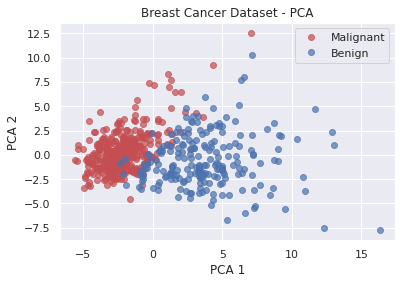

In [28]:
# fitting the scaled dataset into the PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_s)

# convert the PCA data to a dataframe
PCA_df = pd.DataFrame()

# Visualizing the PCA values
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
# Plot the graph
plt.plot(PCA_df['PCA_1'][df.target == 1],PCA_df['PCA_2'][df.target == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.target == 0],PCA_df['PCA_2'][df.target == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Malignant','Benign'])
plt.title('Breast Cancer Dataset - PCA')
plt.show()

In [29]:
# Print the first 5 of the pca dataframe
PCA_df.head()

,PCA_1,PCA_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [30]:
# print maximium expalinable variance by pca
pca_explained_var = pca.explained_variance_ratio_.sum() * 100
pca_explained_var

63.243207651559445

In [31]:
# show the ratio of the expalinable variance by pca component
variance_ratios = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,2), index=['Explained Variance Ratio'])
variance_ratios

,0,1
Explained Variance Ratio,0.44272,0.189712


# **LDA**

In [32]:
# Import LDA Library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# fitting the scaled dataset into LDA
lda = LDA(n_components = 1)
X_lda = lda.fit_transform(X_s, y)

# convert the LDA data to a dataframe
lda_df = pd.DataFrame(X_lda)



In [33]:
# Print the first 5 of the lda dataframe
lda_df.head()

,0
0,-3.323927
1,-2.319108
2,-3.747425
3,-4.048549
4,-2.281158


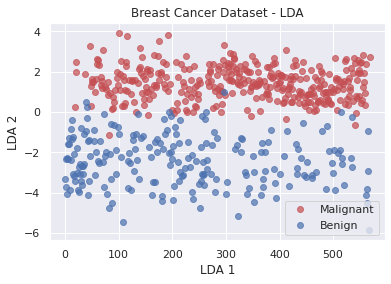

In [34]:
# Visualizing the LDA values
lda_df['lda_1'] = X_lda[:,0]
#lda_df['lda_2'] = X_lda[:,1]

# Plot the graph
plt.plot(lda_df['lda_1'][df.target == 1],'o', alpha = 0.7, color = 'r')
plt.plot(lda_df['lda_1'][df.target == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend(['Malignant','Benign'])
plt.title('Breast Cancer Dataset - LDA')
plt.show()

In [35]:
# Print maximium % expalinable variance by lda 
lda_explained_var = lda.explained_variance_ratio_.sum() * 100
lda_explained_var

100.0

In [36]:
# show the ratio of the expalinable variance by lda component
lda_variance_ratios = pd.DataFrame(lda.explained_variance_ratio_.reshape(1,1), index=['Explained Variance Ratio'])
lda_variance_ratios

,0
Explained Variance Ratio,1.0
